In [2]:
import pandas as pd
import matplotlib.pyplot as plt


def plot_comparison_bar_chart(file_path, metric, score_type):
    # Read CSV file into a pandas DataFrame
    df = pd.read_csv(file_path)

    # Filter data for MUTAG and AIFB separately for the specified metric
    mutag_data = df[(df["Dataset"] == "MUTAG") & (df["Metric"] == metric)]
    aifb_data = df[(df["Dataset"] == "AIFB") & (df["Metric"] == metric)]

    # Calculate mean scores for each model within each dataset
    mutag_scores = mutag_data.groupby("Model")[score_type].mean()
    aifb_scores = aifb_data.groupby("Model")[score_type].mean()

    # Ensure both datasets have the same models for comparison
    common_models = mutag_scores.index.intersection(aifb_scores.index)
    mutag_scores = mutag_scores[common_models]
    aifb_scores = aifb_scores[common_models]

    # Sort models alphabetically
    sorted_models = sorted(common_models)

    # Reindex both series to ensure the order is consistent
    mutag_scores = mutag_scores.reindex(sorted_models)
    aifb_scores = aifb_scores.reindex(sorted_models)

    # Plotting
    fig, ax = plt.subplots()
    bar_width = 0.35
    bar_positions_mutag = range(len(sorted_models))
    bar_positions_aifb = [pos + bar_width for pos in bar_positions_mutag]

    ax.bar(bar_positions_mutag, mutag_scores, bar_width, label="MUTAG")
    ax.bar(bar_positions_aifb, aifb_scores, bar_width, label="AIFB")

    ax.set_xticks([pos + bar_width / 2 for pos in bar_positions_mutag])
    ax.set_xticklabels(
        sorted_models, rotation=45
    )  # Rotate labels for better visibility
    ax.set_ylabel(score_type)
    ax.set_xlabel("Model")
    ax.legend()
    plt.tight_layout()  # Adjusts the plot to fit into the figure area.
    plt.savefig(f"eval_micro/grouped_barplot_{score_type}_{metric}.png", dpi=300, transparent = True)

    plt.show()

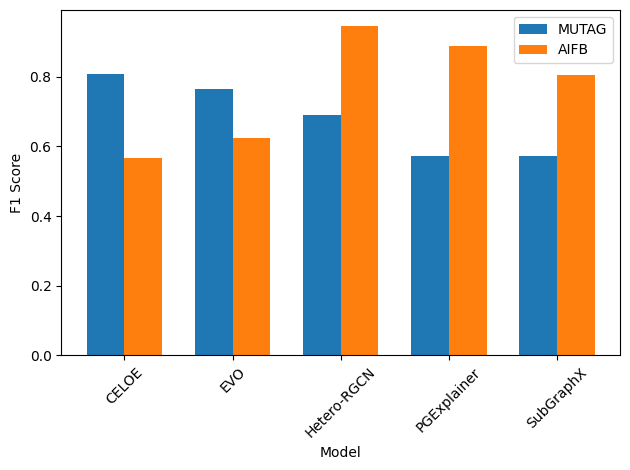

In [3]:
plot_comparison_bar_chart("eval_data_micro.csv", "Prediction Accuracy", "F1 Score")

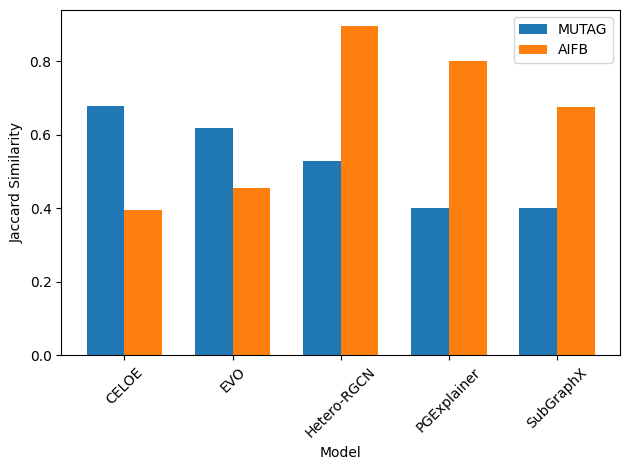

In [4]:
plot_comparison_bar_chart(
    "eval_data_micro.csv", "Prediction Accuracy", "Jaccard Similarity"
)

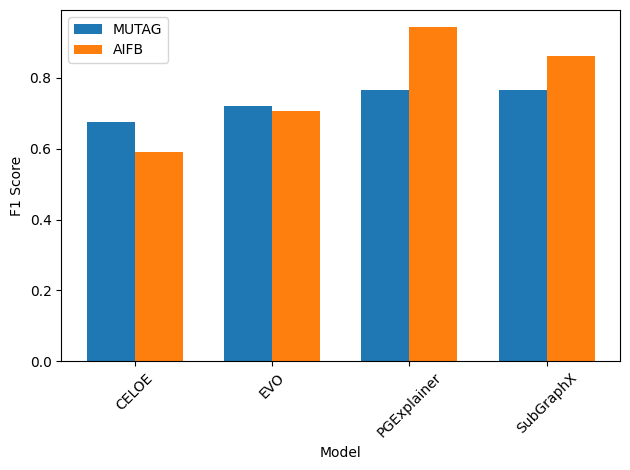

In [5]:
plot_comparison_bar_chart("eval_data_micro.csv", "Fidelity", "F1 Score")

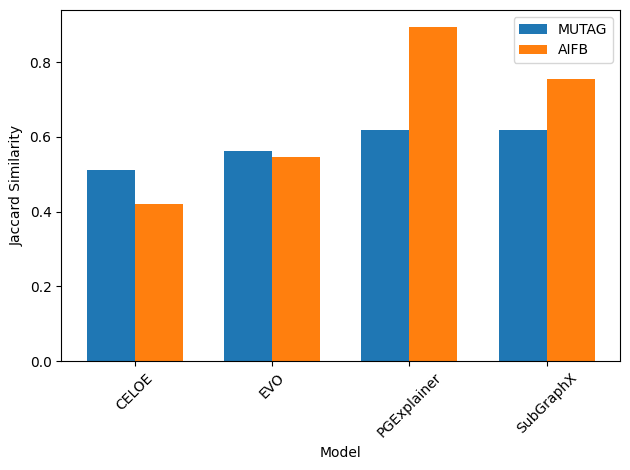

In [6]:
plot_comparison_bar_chart("eval_data_micro.csv", "Fidelity", "Jaccard Similarity")

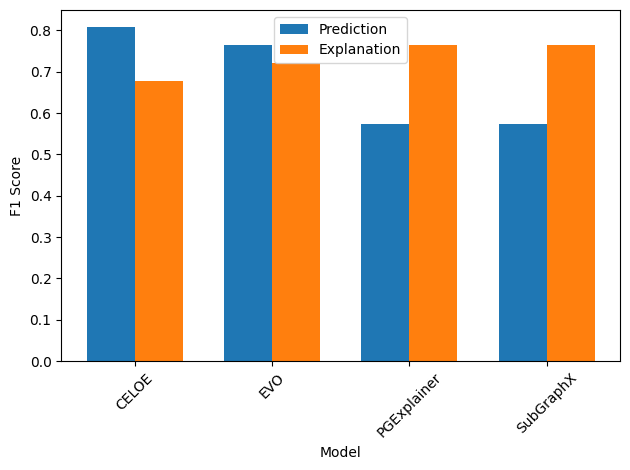

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("eval_data_micro.csv")
mutag_data = df[df["Dataset"] == "MUTAG"]
mutag_pa_data = mutag_data[mutag_data["Metric"].isin(["Prediction Accuracy"])]
mutag_pred = mutag_pa_data[["Model", "F1 Score"]]
mutag_fidelity_data = mutag_data[mutag_data["Metric"].isin(["Fidelity"])]
mutag_fid = mutag_fidelity_data[["Model", "F1 Score"]]
series1 = mutag_pred.set_index("Model")["F1 Score"]
series2 = mutag_fid.set_index("Model")["F1 Score"]
# Extract common elements
common_models = list(set(series1.index) & set(series2.index))

common_models.sort()

# Filter data for common elements after sorting
series1_common_sorted = series1[common_models]
series2_common_sorted = series2[common_models]

# Plotting
fig, ax = plt.subplots()
bar_width = 0.35
bar_positions = range(len(common_models))

ax.bar(bar_positions, series1_common_sorted, bar_width, label="Prediction")
ax.bar(
    [pos + bar_width for pos in bar_positions],
    series2_common_sorted,
    bar_width,
    label="Explanation",
)

ax.set_xticks([pos + bar_width / 2 for pos in bar_positions])
ax.set_xticklabels(common_models, rotation=45)
ax.set_ylabel("F1 Score")
ax.set_xlabel("Model")
ax.legend()
plt.tight_layout()
plt.savefig("eval_micro/mutag_pred_fid.png", dpi=300, transparent = True)


plt.show()

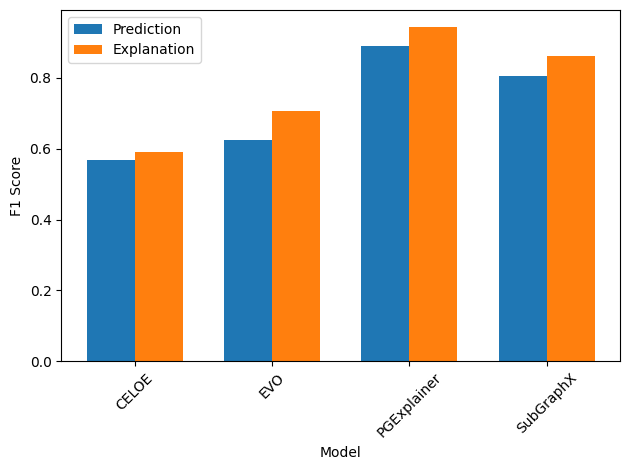

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("eval_data_micro.csv")
mutag_data = df[df["Dataset"] == "AIFB"]
mutag_pa_data = mutag_data[mutag_data["Metric"].isin(["Prediction Accuracy"])]
mutag_pred = mutag_pa_data[["Model", "F1 Score"]]
mutag_fidelity_data = mutag_data[mutag_data["Metric"].isin(["Fidelity"])]
mutag_fid = mutag_fidelity_data[["Model", "F1 Score"]]
series1 = mutag_pred.set_index("Model")["F1 Score"]
series2 = mutag_fid.set_index("Model")["F1 Score"]
# Extract common elements
common_models = list(set(series1.index) & set(series2.index))

common_models.sort()

# Filter data for common elements after sorting
series1_common_sorted = series1[common_models]
series2_common_sorted = series2[common_models]

# Plotting
fig, ax = plt.subplots()
bar_width = 0.35
bar_positions = range(len(common_models))

ax.bar(bar_positions, series1_common_sorted, bar_width, label="Prediction")
ax.bar(
    [pos + bar_width for pos in bar_positions],
    series2_common_sorted,
    bar_width,
    label="Explanation",
)

ax.set_xticks([pos + bar_width / 2 for pos in bar_positions])
ax.set_xticklabels(common_models, rotation=45)
ax.set_ylabel("F1 Score")
ax.set_xlabel("Model")
ax.legend()
plt.tight_layout()
plt.savefig("eval_micro/aifb_pred_fid.png", dpi=300, transparent = True)


plt.show()

In [33]:
def filter_df(df, models, eval_metrics, metric_type):
    """
    Filter the DataFrame based on provided models, a list of evaluation metrics,
    and a metric type (Fidelity or Prediction Accuracy),
    and return selected columns including the dataset name.

    :param df: DataFrame containing the dataset.
    :param models: List of model names to filter.
    :param eval_metrics: List of evaluation metrics to filter (e.g., ['F1 Score', 'Precision']).
    :param metric_type: Type of metric (e.g., 'Fidelity', 'Prediction Accuracy').
    :return: Filtered DataFrame with selected columns.
    """
    # Define the columns to return - adding 'Dataset' to the list
    columns_to_return = ["Dataset", "Model", "Metric"] + eval_metrics

    # Filtering the DataFrame
    filtered_df = df[
        (df["Model"].isin(models)) & (df["Metric"].str.contains(metric_type))
    ]

    # Checking for multiple evaluation metrics and filtering
    for metric in eval_metrics:
        if metric not in df.columns:
            raise ValueError(f"Metric '{metric}' not found in DataFrame columns")

    # Returning only the specified columns
    return filtered_df[columns_to_return]

In [34]:
# Precision	Recall	F1 Score	Jaccard Similarity
# Prediction Accuracy

filtered_data = filter_df(
    df,
    ["SubGraphX", "CELOE", "PGExplainer", "EVO"],
    ["F1 Score"],
    "Fidelity",
)
filtered_data[filtered_data["Dataset"] == "MUTAG"]

,Dataset,Model,Metric,F1 Score
0,MUTAG,CELOE,Fidelity,0.720588
4,MUTAG,EVO,Fidelity,0.632353
9,MUTAG,PGExplainer,Fidelity,0.764706
15,MUTAG,SubGraphX,Fidelity,0.764706


In [31]:
dfm = pd.read_csv("eval_data_macro.csv")

In [36]:
filtered_datam = filter_df(
    dfm,
    ["SubGraphX", "CELOE", "PGExplainer", "EVO"],
    ["F1 Score"],
    "Fidelity",
)
filtered_datam[filtered_datam["Dataset"] == "AIFB"]

,Dataset,Model,Metric,F1 Score
2,AIFB,CELOE,Fidelity,0.266317
6,AIFB,EVO,Fidelity,0.421943
12,AIFB,PGExplainer,Fidelity,0.823654
18,AIFB,SubGraphX,Fidelity,0.763509


In [19]:
def count_examples(input_dict):
    result = {}

    for instance_id, data in input_dict.items():
        print(len(data), instance_id)
        

    return result


# Example usage:
my_dict = {
    "id1instance": {
        "positive_examples_train": [
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id1968instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id1instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id1951instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id1890instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id1908instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id1953instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id1861instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id1842instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2041instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2058instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id1862instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id1901instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2070instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2072instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id44instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id23instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2068instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id1858instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id1882instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id1854instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id1909instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2130instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id1884instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2039instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id1881instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id38instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id1885instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2069instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id1872instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id1954instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id1852instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id1915instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id97instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2062instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id99instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id1992instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2064instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2073instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id1966instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id52instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2126instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id1887instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2087instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2042instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id1859instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id1920instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2088instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id61instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2083instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2046instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2047instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id1958instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id1917instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id21instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2137instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id1895instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2044instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id12instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id1834instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id1900instance"
        ],
        "negative_examples_train": [
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2127instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id87instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id72instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2045instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id15instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id46instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id3instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2008instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2120instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id96instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id16instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2075instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2081instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id24instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id29instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id89instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2038instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id19instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2091instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id4instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id14instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id8instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2139instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2123instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id50instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id98instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id68instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2143instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id40instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2146instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2076instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2099instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id86instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2079instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2065instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2055instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id90instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2115instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id58instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2067instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2156instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2097instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2132instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id53instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id80instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id88instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id51instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id83instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id55instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id91instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2040instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2084instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id6instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2107instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2133instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id76instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id20instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2053instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2023instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2054instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2056instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id11instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id26instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id22instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id34instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id67instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2147instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2153instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2105instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id66instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id71instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2049instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2108instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id36instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id33instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id78instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id43instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2048instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2051instance"
        ],
        "positive_examples_test": [
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id1951instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id87instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id1890instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2105instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id1953instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2041instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2058instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id1901instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id15instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2070instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id46instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2072instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id44instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id23instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id68instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2143instance"
        ],
        "negative_examples_test": [
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id1968instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2127instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id14instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id8instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id1instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2139instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id1908instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id1861instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2123instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id71instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2068instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2008instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id66instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id72instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id1842instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id50instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id98instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id3instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id1862instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2045instance"
        ]
    },
    "id3instance": {
        "positive_examples_train": [
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2127instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id87instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id72instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2045instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id15instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id46instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id3instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2008instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2120instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id96instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id16instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2075instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2081instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id24instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id29instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id89instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2038instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id19instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2091instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id4instance"
        ],
        "negative_examples_train": [
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id1968instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id1instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id1951instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id1890instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id1908instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id1953instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id1861instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id1842instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2041instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2058instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id1862instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id1901instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2070instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2072instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id44instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id23instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2068instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id1858instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id1882instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id1854instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id1909instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2130instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id1884instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2039instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id1881instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id38instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id1885instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2069instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id1872instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id1954instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id1852instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id1915instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id97instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2062instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id99instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id1992instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2064instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2073instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id1966instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id52instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2126instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id1887instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2087instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2042instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id1859instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id1920instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2088instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id61instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2083instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2046instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2047instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id1958instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id1917instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id21instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2137instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id1895instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2044instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id12instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id1834instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id1900instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id14instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id8instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2139instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2123instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id50instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id98instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id68instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2143instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id40instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2146instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2076instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2099instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id86instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2079instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2065instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2055instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id90instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2115instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id58instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2067instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2156instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2097instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2132instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id53instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id80instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id88instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id51instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id83instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id55instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id91instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2040instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2084instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id6instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2107instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2133instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id76instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id20instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2053instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2023instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2054instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2056instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id11instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id26instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id22instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id34instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id67instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2147instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2153instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2105instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id66instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id71instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2049instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2108instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id36instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id33instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id78instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id43instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2048instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2051instance"
        ],
        "positive_examples_test": [
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id66instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id72instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id1842instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id50instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id98instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id3instance"
        ],
        "negative_examples_test": [
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id1968instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2127instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id14instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id8instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id1instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2139instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id1908instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id1861instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2123instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id71instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2068instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2008instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id1951instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id87instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id1890instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2105instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id1953instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2041instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2058instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id1901instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id15instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2070instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id46instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2072instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id44instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id23instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id68instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2143instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id1862instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2045instance"
        ]
    },
    "id2instance": {
        "positive_examples_train": [
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id14instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id8instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2139instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2123instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id50instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id98instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id68instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2143instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id40instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2146instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2076instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2099instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id86instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2079instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2065instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2055instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id90instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2115instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id58instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2067instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2156instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2097instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2132instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id53instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id80instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id88instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id51instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id83instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id55instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id91instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2040instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2084instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id6instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2107instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2133instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id76instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id20instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2053instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2023instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2054instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2056instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id11instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id26instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id22instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id34instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id67instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2147instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2153instance"
        ],
        "negative_examples_train": [
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id1968instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id1instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id1951instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id1890instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id1908instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id1953instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id1861instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id1842instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2041instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2058instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id1862instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id1901instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2070instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2072instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id44instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id23instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2068instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id1858instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id1882instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id1854instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id1909instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2130instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id1884instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2039instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id1881instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id38instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id1885instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2069instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id1872instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id1954instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id1852instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id1915instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id97instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2062instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id99instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id1992instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2064instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2073instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id1966instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id52instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2126instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id1887instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2087instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2042instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id1859instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id1920instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2088instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id61instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2083instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2046instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2047instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id1958instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id1917instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id21instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2137instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id1895instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2044instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id12instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id1834instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id1900instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2127instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id87instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id72instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2045instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id15instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id46instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id3instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2008instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2120instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id96instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id16instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2075instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2081instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id24instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id29instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id89instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2038instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id19instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2091instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id4instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2105instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id66instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id71instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2049instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2108instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id36instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id33instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id78instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id43instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2048instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2051instance"
        ],
        "positive_examples_test": [
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id1968instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2127instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id14instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id8instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id1instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2139instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id1908instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id1861instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2123instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id71instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2068instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2008instance"
        ],
        "negative_examples_test": [
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id1951instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id87instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id1890instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2105instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id1953instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2041instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2058instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id1901instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id15instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2070instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id46instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2072instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id44instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id23instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id68instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2143instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id66instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id72instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id1842instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id50instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id98instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id3instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id1862instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2045instance"
        ]
    },
    "id4instance": {
        "positive_examples_train": [
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2105instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id66instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id71instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2049instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2108instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id36instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id33instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id78instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id43instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2048instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2051instance"
        ],
        "negative_examples_train": [
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id1968instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id1instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id1951instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id1890instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id1908instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id1953instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id1861instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id1842instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2041instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2058instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id1862instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id1901instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2070instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2072instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id44instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id23instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2068instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id1858instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id1882instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id1854instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id1909instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2130instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id1884instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2039instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id1881instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id38instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id1885instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2069instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id1872instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id1954instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id1852instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id1915instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id97instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2062instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id99instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id1992instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2064instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2073instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id1966instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id52instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2126instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id1887instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2087instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2042instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id1859instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id1920instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2088instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id61instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2083instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2046instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2047instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id1958instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id1917instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id21instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2137instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id1895instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2044instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id12instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id1834instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id1900instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2127instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id87instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id72instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2045instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id15instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id46instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id3instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2008instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2120instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id96instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id16instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2075instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2081instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id24instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id29instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id89instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2038instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id19instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2091instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id4instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id14instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id8instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2139instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2123instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id50instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id98instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id68instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2143instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id40instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2146instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2076instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2099instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id86instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2079instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2065instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2055instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id90instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2115instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id58instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2067instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2156instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2097instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2132instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id53instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id80instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id88instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id51instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id83instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id55instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id91instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2040instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2084instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id6instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2107instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2133instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id76instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id20instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2053instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2023instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2054instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2056instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id11instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id26instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id22instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id34instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id67instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2147instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2153instance"
        ],
        "positive_examples_test": [
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id1862instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2045instance"
        ],
        "negative_examples_test": [
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id1968instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2127instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id14instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id8instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id1instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2139instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id1908instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id1861instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2123instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id71instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2068instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2008instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id1951instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id87instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id1890instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2105instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id1953instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2041instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2058instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id1901instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id15instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2070instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id46instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2072instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id44instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id23instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id68instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id2143instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id66instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id72instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id1842instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id50instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id98instance",
            "http://www.aifb.uni-karlsruhe.de/Personen/viewPersonOWL/id3instance"
        ]
    }
}

result = count_examples(my_dict["id2instance"])

for key, value in result.items():
    print(f"Number of items in {key}: {value}")


48 positive_examples_train
92 negative_examples_train
12 positive_examples_test
24 negative_examples_test
